In [1]:
#Read fire dataset

import pandas as pd
pdFires = pd.read_pickle("C:\\Users\\yangz\\Desktop\\FireProject\\pdFires.pkl")
pdFires


,OBJECTID,poly_Incid,poly_Featu,poly_MapMe,poly_GISAc,poly_Creat,poly_DateC,poly_Polyg,poly_Acres,poly_Globa,...,irwin_Stra,irwin_Glob,irwin_Sour,irwin_Arch,irwin_Mo_1,irwin_Cr_1,Shape__Are,Shape__Len,GlobalID,geometry
0,127,Coleman,Wildfire Daily Fire Perimeter,Mixed Methods,562.913504,2021-05-04,2021-05-04,None,562.911767,{951569B8-EA6B-443B-8BF7-022AE1DFC937},...,2020-10-20,None,IRWIN,None,2021-03-26,2020-10-18,2.280138e-04,0.120036,1e48f205-2208-4dbd-8a48-b739fdeacf9c,"POLYGON ((-121.33119 36.11034, -121.33119 36.1..."
1,128,Patrick,Wildfire Daily Fire Perimeter,Mixed Methods,0.151680,2021-05-04,2021-05-04,None,0.151680,{08D5DE2B-51A0-420A-812F-35902565E93A},...,None,None,IRWIN,None,2020-06-19,2020-05-01,6.432038e-08,0.001121,447213e7-190b-4e48-b60c-d0e492efd576,"POLYGON ((-119.57998 39.54731, -119.57998 39.5..."
2,129,Low Top,Wildfire Daily Fire Perimeter,Auto-generated,0.300000,2021-05-04,2021-05-04,2020-08-09,2.850691,{4BBFA91F-8692-4FC6-8917-1E7C2F2678EE},...,None,None,IRWIN,None,2020-08-27,2020-08-08,1.116760e-06,0.004527,ec414cfa-9c17-478c-a07e-849e91501621,"POLYGON ((-110.45075 33.29451, -110.45123 33.2..."
3,130,Sloan 2,Wildfire Daily Fire Perimeter,Mixed Methods,44.300517,2021-05-04,2021-05-04,None,44.300352,{7AE9D007-FBA4-440B-972B-69791E156BE8},...,None,None,IRWIN,None,2021-01-27,2020-05-08,1.789169e-05,0.032394,c882c4c8-1420-4d68-9012-b24eda77d6b7,"POLYGON ((-115.20679 35.87232, -115.20679 35.8..."
4,133,Bloody nose,Wildfire Daily Fire Perimeter,Mixed Methods,NaN,2021-05-04,2021-05-04,None,6.211367,{A3BBB888-93FB-405C-A449-EF675D72C65E},...,None,None,IRWIN,None,2021-01-13,2020-08-21,2.778723e-06,0.008458,01476f18-2dc0-473c-bf80-58544fa68344,"POLYGON ((-100.98539 43.08670, -100.98538 43.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7416,13025,Parson - Wibaux,Wildfire Daily Fire Perimeter,GPS-Walked/Driven,NaN,2021-08-04,2021-08-04,None,36.702398,{972F03DF-1CC9-46C4-83E0-EB816A115A9D},...,None,None,IRWIN,None,2021-08-04,2021-07-28,1.763442e-05,0.021004,aaf6c337-5c9d-4b5a-a33b-7208cf22181c,"POLYGON ((-104.23380 47.20838, -104.23376 47.2..."
7417,13026,Tobin,Wildfire Daily Fire Perimeter,Auto-generated,NaN,2021-08-04,2021-08-04,None,7.332431,{9F2E8043-9202-4AA7-B86A-D2E47726DFF2},...,None,None,IRWIN,None,2021-08-04,2021-07-23,3.418049e-06,0.011149,e119145b-f8d2-43ac-8e08-701ce7fcc0dc,"POLYGON ((-105.94723 45.53457, -105.94721 45.5..."
7418,13027,Willow,Wildfire Daily Fire Perimeter,GPS-Walked,NaN,2021-06-24,2021-08-04,None,0.015745,{44B3B457-64A3-4621-99C5-B67520C233B4},...,None,None,IRWIN,None,2021-07-24,2021-07-24,6.921255e-09,0.000323,7b4fd973-c042-494d-9684-f52e20460d01,"POLYGON ((-121.07037 41.98487, -121.07036 41.9..."
7419,13028,Indian Creek,Wildfire Daily Fire Perimeter,Phone/Tablet,8.021464,2021-08-02,2021-08-04,None,8.021434,{9B9073DD-1C12-4025-BDD3-0E96DE7BE08E},...,None,None,IRWIN,None,2021-08-04,2021-07-26,3.654145e-06,0.012214,7dcb7c71-03b6-4e70-9144-7ef9c694e7c4,"POLYGON ((-106.25523 44.19271, -106.25520 44.1..."


In [2]:
testStartDate = pdFires.at[0, "irwin_Fi_9"]
testControlDate = pdFires.at[0, "irwin_Co_1"]
testPoly = pdFires.at[0, "geometry"]
#print (testStartDate)
#print (testControlDate)
#print (testPoly)
testBounds = list(testPoly.bounds)
print (testBounds)
testBounds[0] = testBounds[0]-0.005
testBounds[1] = testBounds[1]-0.005
testBounds[2] = testBounds[2]+0.005
testBounds[3] = testBounds[3]+0.005
print (testBounds)


[-121.36117987899, 36.1020922223474, -121.328780449435, 36.1168969086802]
[-121.36617987899, 36.0970922223474, -121.323780449435, 36.1218969086802]


In [3]:
from sentinelhub import SHConfig
import sentinelhub

config = SHConfig()

%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import datetime
import numpy as np
import matplotlib.pyplot as plt

from sentinelhub import MimeType, CRS, BBox, SentinelHubRequest, SentinelHubDownloadClient, \
    DataCollection, bbox_to_dimensions, DownloadRequest

def plot_image(image, factor=1.0, clip_range = None, **kwargs):
    """
    Utility function for plotting RGB images.
    """
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
    if clip_range is not None:
        pos = ax.imshow(np.clip(image * factor, *clip_range), **kwargs)
        fig.colorbar(pos, ax=ax)
        
    else:
        ax.imshow(image * factor, **kwargs)
    ax.set_xticks([])
    ax.set_yticks([])


In [ ]:
from datetime import timedelta
#Acquiring the data
count = 488
for i in range (2400, 7421):
    startDate = pdFires.at[i, "irwin_Fi_9"]
    controlDate = pdFires.at[i, "irwin_Co_1"]
    periPoly = pdFires.at[i, "geometry"]
    polyAcres = pdFires.at[i, "poly_Acres"]
    
    #filter out nones
    if str(startDate) == "None":
        print ("Skipped " + str(i))
        continue
    if str(controlDate) == "None":
        print ("Skipped " + str(i))
        continue
    if str(periPoly) == "None":
        print ("Skipped " + str(i))
        continue
    if str(startDate)==str(controlDate):
        print ("Skipped " + str(i))
        continue
    if str(polyAcres) == "None":
        print ("Skipped " + str(i))
        continue
    if int(polyAcres) < 40:
        print ("Skipped " + str(i))
        continue
    
    try:
        #calculating the dates
        controlDateNew = ""
        controlDateNew = controlDateNew+controlDate[5:7]+"/"
        controlDateNew = controlDateNew+controlDate[8:10]+"/"
        controlDateNew = controlDateNew+controlDate[2:4]
        #print (controlDateNew)
        controlDateNew1 = datetime.datetime.strptime(controlDateNew, "%m/%d/%y")
        controlDateNew1 += timedelta(days=-1)
        controlDateNew1 = str(controlDateNew1)
        controlDateNew1 = controlDateNew1[0:10]
        controlDateNew2 = datetime.datetime.strptime(controlDateNew, "%m/%d/%y")
        controlDateNew2 += timedelta(days=10)
        controlDateNew2 = str(controlDateNew2)
        controlDateNew2 = controlDateNew2[0:10]
        #print (controlDateNew1)
        #print (controlDateNew2)

        startDateNew = ""
        startDateNew = startDateNew+startDate[5:7]+"/"
        startDateNew = startDateNew+startDate[8:10]+"/"
        startDateNew = startDateNew+startDate[2:4]
        #print (startDateNew)
        startDateNew1 = datetime.datetime.strptime(startDateNew, "%m/%d/%y")
        startDateNew1 += timedelta(days=-10)
        startDateNew1 = str(startDateNew1)
        startDateNew1 = startDateNew1[0:10]
        startDateNew2 = datetime.datetime.strptime(startDateNew, "%m/%d/%y")
        startDateNew2 += timedelta(days=1)
        startDateNew2 = str(startDateNew2)
        startDateNew2 = startDateNew2[0:10]
        #print (startDateNew1)
        #print (startDateNew2)

        earlyDate1 = datetime.datetime.strptime(startDateNew, "%m/%d/%y")
        earlyDate1 += timedelta(days=-40)
        earlyDate1 = str(earlyDate1)
        earlyDate1 = earlyDate1[0:10]
        earlyDate2 = datetime.datetime.strptime(startDateNew, "%m/%d/%y")
        earlyDate2 += timedelta(days=-30)
        earlyDate2 = str(earlyDate2)
        earlyDate2 = earlyDate2[0:10]
        #print (earlyDate1)
        #print (earlyDate2)

        #getting the bounding box
        bounds = list(periPoly.bounds)
        bounds[0] = bounds[0]-0.005
        bounds[1] = bounds[1]-0.005
        bounds[2] = bounds[2]+0.005
        bounds[3] = bounds[3]+0.005
        #print (bounds)
        bbox = BBox(bbox=bounds, crs=CRS.WGS84)
        #bbox_resolution = sentinelhub.geo_utils.bbox_to_resolution(bbox, 444, 340, meters=True)
        #bbox_size = bbox_to_dimensions(bbox, resolution=bbox_resolution)
        #print(f'Image shape at {bbox_resolution} m resolution: {bbox_size} pixels')

        #defining the evalscripts
        evalscript2 = """
            //VERSION=3

            function setup() {
                return {
                    input: [{
                        bands: ["B02"]
                    }],
                    output: {
                        bands: 1
                    }
                };
            }

            function evaluatePixel(sample) {
                return [sample.B02];
            }
        """
        evalscript3 = """
            //VERSION=3

            function setup() {
                return {
                    input: [{
                        bands: ["B03"]
                    }],
                    output: {
                        bands: 1
                    }
                };
            }

            function evaluatePixel(sample) {
                return [sample.B03];
            }
        """
        evalscript4 = """
            //VERSION=3

            function setup() {
                return {
                    input: [{
                        bands: ["B04"]
                    }],
                    output: {
                        bands: 1
                    }
                };
            }

            function evaluatePixel(sample) {
                return [sample.B04];
            }
        """
        evalscript8 = """
            //VERSION=3

            function setup() {
                return {
                    input: [{
                        bands: ["B08"]
                    }],
                    output: {
                        bands: 1
                    }
                };
            }

            function evaluatePixel(sample) {
                return [sample.B08];
            }
        """
        evalscript12 = """
            //VERSION=3

            function setup() {
                return {
                    input: [{
                        bands: ["B12"]
                    }],
                    output: {
                        bands: 1
                    }
                };
            }

            function evaluatePixel(sample) {
                return [sample.B12];
            }
        """

        #defining the early requests
        earlyRequest2 = SentinelHubRequest(
            evalscript=evalscript2,
            input_data=[
                SentinelHubRequest.input_data(
                    data_collection=DataCollection.SENTINEL2_L1C,
                    time_interval=(earlyDate1, earlyDate2),
                )
            ],
            responses=[
                SentinelHubRequest.output_response('default', MimeType.PNG)
            ],
            bbox=bbox,
            size=(444, 340),
            config=config
        )
        earlyRequest3 = SentinelHubRequest(
            evalscript=evalscript3,
            input_data=[
                SentinelHubRequest.input_data(
                    data_collection=DataCollection.SENTINEL2_L1C,
                    time_interval=(earlyDate1, earlyDate2),
                )
            ],
            responses=[
                SentinelHubRequest.output_response('default', MimeType.PNG)
            ],
            bbox=bbox,
            size=(444, 340),
            config=config
        )
        earlyRequest4 = SentinelHubRequest(
            evalscript=evalscript4,
            input_data=[
                SentinelHubRequest.input_data(
                    data_collection=DataCollection.SENTINEL2_L1C,
                    time_interval=(earlyDate1, earlyDate2),
                )
            ],
            responses=[
                SentinelHubRequest.output_response('default', MimeType.PNG)
            ],
            bbox=bbox,
            size=(444, 340),
            config=config
        )
        earlyRequest8 = SentinelHubRequest(
            evalscript=evalscript8,
            input_data=[
                SentinelHubRequest.input_data(
                    data_collection=DataCollection.SENTINEL2_L1C,
                    time_interval=(earlyDate1, earlyDate2),
                )
            ],
            responses=[
                SentinelHubRequest.output_response('default', MimeType.PNG)
            ],
            bbox=bbox,
            size=(444, 340),
            config=config
        )
        earlyRequest12 = SentinelHubRequest(
            evalscript=evalscript12,
            input_data=[
                SentinelHubRequest.input_data(
                    data_collection=DataCollection.SENTINEL2_L1C,
                    time_interval=(earlyDate1, earlyDate2),
                )
            ],
            responses=[
                SentinelHubRequest.output_response('default', MimeType.PNG)
            ],
            bbox=bbox,
            size=(444, 340),
            config=config
        )

        #requesting the early data
        early2 = earlyRequest2.get_data()
        early3 = earlyRequest3.get_data()
        early4 = earlyRequest4.get_data()
        early8 = earlyRequest8.get_data()
        early12 = earlyRequest12.get_data()
        #earlyImageStack = np.concatenate((early2, early3, early4, early8, early12), axis=0)

        #calculating the earlyNBR, earlyNDVI, earlyNDWI
        earlyNBR = np.divide(np.subtract(early8, early12, dtype="int"), 
                           np.add(early8, early12, dtype="int"), dtype="float64")
        earlyNDVI = np.divide(np.subtract(early8, early4, dtype="int"), 
                           np.add(early8, early4, dtype="int"), dtype="float64")
        earlyNDWI = np.divide(np.subtract(early3, early8, dtype="int"), 
                           np.add(early8, early8, dtype="int"), dtype="float64")

        #----------------------------------------------------------------------------

        #defining the pre fire requests
        preRequest2 = SentinelHubRequest(
            evalscript=evalscript2,
            input_data=[
                SentinelHubRequest.input_data(
                    data_collection=DataCollection.SENTINEL2_L1C,
                    time_interval=(startDateNew1, startDateNew2),
                )
            ],
            responses=[
                SentinelHubRequest.output_response('default', MimeType.PNG)
            ],
            bbox=bbox,
            size=(444, 340),
            config=config
        )
        preRequest3 = SentinelHubRequest(
            evalscript=evalscript3,
            input_data=[
                SentinelHubRequest.input_data(
                    data_collection=DataCollection.SENTINEL2_L1C,
                    time_interval=(startDateNew1, startDateNew2),
                )
            ],
            responses=[
                SentinelHubRequest.output_response('default', MimeType.PNG)
            ],
            bbox=bbox,
            size=(444, 340),
            config=config
        )
        preRequest4 = SentinelHubRequest(
            evalscript=evalscript4,
            input_data=[
                SentinelHubRequest.input_data(
                    data_collection=DataCollection.SENTINEL2_L1C,
                    time_interval=(startDateNew1, startDateNew2),
                )
            ],
            responses=[
                SentinelHubRequest.output_response('default', MimeType.PNG)
            ],
            bbox=bbox,
            size=(444, 340),
            config=config
        )
        preRequest8 = SentinelHubRequest(
            evalscript=evalscript8,
            input_data=[
                SentinelHubRequest.input_data(
                    data_collection=DataCollection.SENTINEL2_L1C,
                    time_interval=(startDateNew1, startDateNew2),
                )
            ],
            responses=[
                SentinelHubRequest.output_response('default', MimeType.PNG)
            ],
            bbox=bbox,
            size=(444, 340),
            config=config
        )
        preRequest12 = SentinelHubRequest(
            evalscript=evalscript12,
            input_data=[
                SentinelHubRequest.input_data(
                    data_collection=DataCollection.SENTINEL2_L1C,
                    time_interval=(startDateNew1, startDateNew2),
                )
            ],
            responses=[
                SentinelHubRequest.output_response('default', MimeType.PNG)
            ],
            bbox=bbox,
            size=(444, 340),
            config=config
        )

        #requesting the pre fire data
        pre2 = preRequest2.get_data()
        pre3 = preRequest3.get_data()
        pre4 = preRequest4.get_data()
        pre8 = preRequest8.get_data()
        pre12 = preRequest12.get_data()
        #preImageStack = np.concatenate((pre2, pre3, pre4, pre8, pre12), axis=0)

        #calculating the preNBR, preNDVI
        preNBR = np.divide(np.subtract(pre8, pre12, dtype="int"), 
                           np.add(pre8, pre12, dtype="int"), dtype="float64")
        #print (preNBR.shape)
        preNDVI = np.divide(np.subtract(pre8, pre4, dtype="int"), 
                           np.add(pre8, pre4, dtype="int"), dtype="float64")
        preNDWI = np.divide(np.subtract(pre3, pre8, dtype="int"), 
                           np.add(pre3, pre8, dtype="int"), dtype="float64")

        #defining the post fire requests
        postRequest2 = SentinelHubRequest(
            evalscript=evalscript2,
            input_data=[
                SentinelHubRequest.input_data(
                    data_collection=DataCollection.SENTINEL2_L1C,
                    time_interval=(controlDateNew1, controlDateNew2),
                )
            ],
            responses=[
                SentinelHubRequest.output_response('default', MimeType.PNG)
            ],
            bbox=bbox,
            size=(444, 340),
            config=config
        )
        postRequest3 = SentinelHubRequest(
            evalscript=evalscript3,
            input_data=[
                SentinelHubRequest.input_data(
                    data_collection=DataCollection.SENTINEL2_L1C,
                    time_interval=(controlDateNew1, controlDateNew2),
                )
            ],
            responses=[
                SentinelHubRequest.output_response('default', MimeType.PNG)
            ],
            bbox=bbox,
            size=(444, 340),
            config=config
        )
        postRequest4 = SentinelHubRequest(
            evalscript=evalscript4,
            input_data=[
                SentinelHubRequest.input_data(
                    data_collection=DataCollection.SENTINEL2_L1C,
                    time_interval=(controlDateNew1, controlDateNew2),
                )
            ],
            responses=[
                SentinelHubRequest.output_response('default', MimeType.PNG)
            ],
            bbox=bbox,
            size=(444, 340),
            config=config
        )
        postRequest8 = SentinelHubRequest(
            evalscript=evalscript8,
            input_data=[
                SentinelHubRequest.input_data(
                    data_collection=DataCollection.SENTINEL2_L1C,
                    time_interval=(controlDateNew1, controlDateNew2),
                )
            ],
            responses=[
                SentinelHubRequest.output_response('default', MimeType.PNG)
            ],
            bbox=bbox,
            size=(444, 340),
            config=config
        )
        postRequest12 = SentinelHubRequest(
            evalscript=evalscript12,
            input_data=[
                SentinelHubRequest.input_data(
                    data_collection=DataCollection.SENTINEL2_L1C,
                    time_interval=(controlDateNew1, controlDateNew2),
                )
            ],
            responses=[
                SentinelHubRequest.output_response('default', MimeType.PNG)
            ],
            bbox=bbox,
            size=(444, 340),
            config=config
        )

        #requesting the post fire data
        post2 = postRequest2.get_data()
        post3 = postRequest3.get_data()
        post4 = postRequest4.get_data()
        post8 = postRequest8.get_data()
        post12 = postRequest12.get_data()
        #postImageStack = np.concatenate((post2, post3, post4, post8, post12), axis=0)

        #calculating the preNBR, preNDVI
        postNBR = np.divide(np.subtract(post8, post12, dtype="int"), np.add(post8, post12, dtype="int"), dtype="float64")
        postNDVI = np.divide(np.subtract(post8, post4, dtype="int"), 
                           np.add(post8, post4, dtype="int"), dtype="float64")
        postNDWI = np.divide(np.subtract(post3, post8, dtype="int"), 
                             np.add(post3, post8, dtype="int"), dtype="float64")

        dNBRBeginning = earlyNBR-preNBR
        dNBRControl = earlyNBR-postNBR
        dNBRCombined = dNBRBeginning+dNBRControl

        RBRBeginning = dNBRBeginning/(earlyNBR+1.001)
        RBRControl = dNBRControl/(earlyNBR+1.001)
        RBRCombined = RBRBeginning+RBRControl

        dNDVIBeginning = earlyNDVI-preNDVI
        dNDVIControl = earlyNDVI-postNDVI
        dNDVICombined = dNDVIBeginning+dNDVIControl

        dNBRCombined = dNBRCombined*1000
        RBRCombined = RBRCombined*1000
        dNDVICombined = dNDVICombined*1000
        dNBRControl = dNBRControl*1000
        RBRControl = RBRControl*1000
        dNDVIControl = dNDVIControl*1000
        combinedIndex = (dNBRCombined+RBRCombined+dNDVICombined+dNBRControl+RBRControl+dNDVIControl)/3
        combinedNDWI = earlyNDWI+preNDWI+postNDWI

        #plot_image(post8[0], factor=3.5/255, clip_range=(0,1))

        periCombined = np.concatenate((dNBRControl, RBRControl, dNDVIControl, dNBRCombined, RBRCombined, dNDVICombined, 
                                       combinedIndex, combinedNDWI, earlyNDVI, post2, post3, post4), axis=0)
        detecPreCombined = np.concatenate((earlyNBR, earlyNDVI, earlyNDWI, early2, early3, 
                                        early4), axis=0)
        detecPostCombined = np.concatenate((postNBR, postNDVI, postNDWI, post2, post3, 
                                        post4), axis=0)

        periFilePath = "C:\\Users\\yangz\\Desktop\\FireProjectBatchDownloadNew\\Perimeter\\" + str(count) + "_" + str(pdFires.at[i, "poly_Incid"]) + "_" + str(i)
        detecFilePathPre = "C:\\Users\\yangz\\Desktop\\FireProjectBatchDownloadNew\\Detection\\" + str(count) + "_" + str(pdFires.at[i, "poly_Incid"]) + "_Pre" + str(i)
        detecFilePathPost = "C:\\Users\\yangz\\Desktop\\FireProjectBatchDownloadNew\\Detection\\" + str(count) + "_" + str(pdFires.at[i, "poly_Incid"]) + "_Post" + str(i)
        np.save(periFilePath, periCombined)
        np.save(detecFilePathPre, detecPreCombined)
        np.save(detecFilePathPost, detecPostCombined)
        #np.save("C:\\Users\\yangz\\Desktop\\FireProjectScriptedData\\test2", periCombined)
        count += 1

        print ("Processed " + str(i))
    
    except:
        print ("Failed to process " + str(i))
    
print ("Completed")


Processed 2400
Skipped 2401
Skipped 2402
Skipped 2403
Skipped 2404
Processed 2405
Skipped 2406
Skipped 2407
Skipped 2408
Skipped 2409
Skipped 2410
Processed 2411
Processed 2412
Skipped 2413
Skipped 2414
Skipped 2415
Processed 2416
Skipped 2417
Skipped 2418
Skipped 2419
Processed 2420
Skipped 2421
Skipped 2422
Skipped 2423
Skipped 2424
Skipped 2425
Processed 2426
Skipped 2427
Processed 2428


<ipython-input-4-b25070889d41>:269: RuntimeWarning: divide by zero encountered in true_divide
  earlyNDWI = np.divide(np.subtract(early3, early8, dtype="int"),


Processed 2429
Skipped 2430
Skipped 2431
Skipped 2432
Skipped 2433
Processed 2434
Processed 2435
Skipped 2436
Skipped 2437
Processed 2438
Skipped 2439
Skipped 2440
Processed 2441
Skipped 2442
Skipped 2443
Skipped 2444
Skipped 2445
Skipped 2446
Skipped 2447
Skipped 2448
Skipped 2449
Skipped 2450
Skipped 2451
Skipped 2452
Processed 2453
Skipped 2454
Skipped 2455
Skipped 2456
Processed 2457
Skipped 2458
Skipped 2459
Skipped 2460
Skipped 2461
Processed 2462
Processed 2463
Skipped 2464
Processed 2465
Skipped 2466
Skipped 2467
Skipped 2468
Processed 2469
Skipped 2470
Processed 2471
Skipped 2472
Skipped 2473
Processed 2474
Skipped 2475
Skipped 2476
Processed 2477
Skipped 2478
Processed 2479
Skipped 2480
Skipped 2481
Processed 2482
Skipped 2483
Skipped 2484
Processed 2485
Processed 2486
Skipped 2487
Skipped 2488
Skipped 2489
Skipped 2490
Skipped 2491
Skipped 2492
Skipped 2493
Skipped 2494
Processed 2495
Skipped 2496
Skipped 2497
Skipped 2498
Processed 2499
Skipped 2500
Processed 2501
Processed

<ipython-input-4-b25070889d41>:265: RuntimeWarning: invalid value encountered in true_divide
  earlyNBR = np.divide(np.subtract(early8, early12, dtype="int"),
<ipython-input-4-b25070889d41>:360: RuntimeWarning: invalid value encountered in true_divide
  preNBR = np.divide(np.subtract(pre8, pre12, dtype="int"),


Processed 2896
Skipped 2897
Processed 2898
Skipped 2899
Skipped 2900
Skipped 2901
Processed 2902
Skipped 2903
Skipped 2904
Skipped 2905
Skipped 2906
Processed 2907
Skipped 2908
Processed 2909
Skipped 2910
Skipped 2911
Skipped 2912
Processed 2913
Skipped 2914
Skipped 2915
Processed 2916
Skipped 2917
Processed 2918
Skipped 2919
Skipped 2920
Processed 2921
Skipped 2922
Skipped 2923
Processed 2924
Processed 2925
Skipped 2926
Skipped 2927
Skipped 2928
Skipped 2929
Processed 2930
Skipped 2931
Skipped 2932
Processed 2933
Skipped 2934
Skipped 2935
Skipped 2936
Skipped 2937
Skipped 2938
Skipped 2939
Skipped 2940
Skipped 2941
Processed 2942
Skipped 2943
Skipped 2944
Skipped 2945
Skipped 2946
Skipped 2947
Skipped 2948
Skipped 2949
Skipped 2950
Processed 2951
Skipped 2952
Skipped 2953
Processed 2954
Processed 2955
Skipped 2956
Skipped 2957
Skipped 2958
Processed 2959
Processed 2960
Processed 2961
Skipped 2962
Processed 2963
Skipped 2964
Processed 2965
Skipped 2966
Skipped 2967
Skipped 2968
Skipped

Processed 3503
Skipped 3504
Skipped 3505
Skipped 3506
Skipped 3507
Skipped 3508
Skipped 3509
Skipped 3510
Skipped 3511
Skipped 3512
Skipped 3513
Processed 3514
Skipped 3515
Processed 3516
Skipped 3517
Skipped 3518
Skipped 3519
Skipped 3520
Skipped 3521
Skipped 3522
Skipped 3523
Skipped 3524
Skipped 3525
Skipped 3526
Processed 3527
Skipped 3528
Skipped 3529
Skipped 3530
Skipped 3531
Skipped 3532
Processed 3533
Processed 3534
Skipped 3535
Processed 3536
Skipped 3537
Skipped 3538
Processed 3539
Skipped 3540
Skipped 3541
Skipped 3542
Skipped 3543
Processed 3544
Skipped 3545
Skipped 3546
Skipped 3547
Skipped 3548
Skipped 3549
Processed 3550
Processed 3551
Processed 3552
Skipped 3553
Skipped 3554
Processed 3555
Skipped 3556


<ipython-input-4-b25070889d41>:267: RuntimeWarning: invalid value encountered in true_divide
  earlyNDVI = np.divide(np.subtract(early8, early4, dtype="int"),
<ipython-input-4-b25070889d41>:363: RuntimeWarning: invalid value encountered in true_divide
  preNDVI = np.divide(np.subtract(pre8, pre4, dtype="int"),
<ipython-input-4-b25070889d41>:365: RuntimeWarning: invalid value encountered in true_divide
  preNDWI = np.divide(np.subtract(pre3, pre8, dtype="int"),


Processed 3557
Skipped 3558
Processed 3559
Skipped 3560
Processed 3561
Processed 3562
Processed 3563
Failed to process 3564
Skipped 3565
Skipped 3566
Processed 3567
Skipped 3568
Skipped 3569
Processed 3570
Skipped 3571
Skipped 3572
Processed 3573
Skipped 3574
Processed 3575
Skipped 3576
Skipped 3577
Processed 3578
Skipped 3579
Skipped 3580
Skipped 3581
Skipped 3582
Skipped 3583
Skipped 3584
Skipped 3585
Skipped 3586
Skipped 3587
Skipped 3588
Processed 3589
Skipped 3590
Processed 3591
Processed 3592
Skipped 3593
Skipped 3594
Processed 3595
Processed 3596
Skipped 3597
Skipped 3598
Processed 3599
Skipped 3600
Skipped 3601
Processed 3602
Skipped 3603
Processed 3604
Skipped 3605
Skipped 3606
Skipped 3607
Skipped 3608
Skipped 3609
Skipped 3610
Skipped 3611
Skipped 3612
Skipped 3613
Skipped 3614
Skipped 3615
Skipped 3616
Skipped 3617
Skipped 3618
Skipped 3619
Skipped 3620
Processed 3621
Skipped 3622
Processed 3623
Skipped 3624
Processed 3625
Processed 3626
Skipped 3627
Skipped 3628
Skipped 36

Processed 4165
Processed 4166
Skipped 4167
Processed 4168
Skipped 4169
Processed 4170
Skipped 4171
Skipped 4172
Processed 4173
Skipped 4174
Skipped 4175
Skipped 4176
Skipped 4177
Skipped 4178
Skipped 4179
Skipped 4180
Processed 4181
Processed 4182
Skipped 4183
Processed 4184
Skipped 4185
Skipped 4186
Skipped 4187
Skipped 4188
Skipped 4189
Skipped 4190
Skipped 4191
Skipped 4192
Skipped 4193
Skipped 4194
Skipped 4195
Skipped 4196


<ipython-input-4-b25070889d41>:454: RuntimeWarning: invalid value encountered in true_divide
  postNBR = np.divide(np.subtract(post8, post12, dtype="int"), np.add(post8, post12, dtype="int"), dtype="float64")
<ipython-input-4-b25070889d41>:455: RuntimeWarning: invalid value encountered in true_divide
  postNDVI = np.divide(np.subtract(post8, post4, dtype="int"),
<ipython-input-4-b25070889d41>:457: RuntimeWarning: invalid value encountered in true_divide
  postNDWI = np.divide(np.subtract(post3, post8, dtype="int"),


Processed 4197
Processed 4198
Skipped 4199
Skipped 4200
Skipped 4201
Skipped 4202
Skipped 4203
Skipped 4204
Skipped 4205
Skipped 4206
Processed 4207
Skipped 4208
Skipped 4209
Processed 4210
Skipped 4211
Processed 4212
Skipped 4213
Processed 4214
Skipped 4215
Skipped 4216
Skipped 4217
Processed 4218
Skipped 4219
Skipped 4220
Processed 4221
Skipped 4222
Skipped 4223
Skipped 4224
Skipped 4225
Processed 4226
Skipped 4227
Skipped 4228
Skipped 4229
Processed 4230
Skipped 4231
Skipped 4232
Processed 4233
Skipped 4234
Skipped 4235
Skipped 4236
Skipped 4237
Skipped 4238
Skipped 4239
Skipped 4240
Skipped 4241
Processed 4242
Processed 4243
Skipped 4244
Processed 4245
Processed 4246
Skipped 4247
Skipped 4248
Skipped 4249
Skipped 4250
Skipped 4251
Processed 4252
Skipped 4253
Processed 4254
Processed 4255
Processed 4256
Skipped 4257
Skipped 4258
Skipped 4259
Skipped 4260
Processed 4261
Processed 4262
Skipped 4263
Skipped 4264
Skipped 4265
Processed 4266
Skipped 4267
Skipped 4268
Processed 4269
Skipp

In [6]:
with open('C:\\Users\\yangz\\Desktop\\FireProjectScriptedData\\test2.npy', 'rb') as f:
    savedStack = np.load(f)

In [7]:
savedStack.shape

(8, 340, 444)

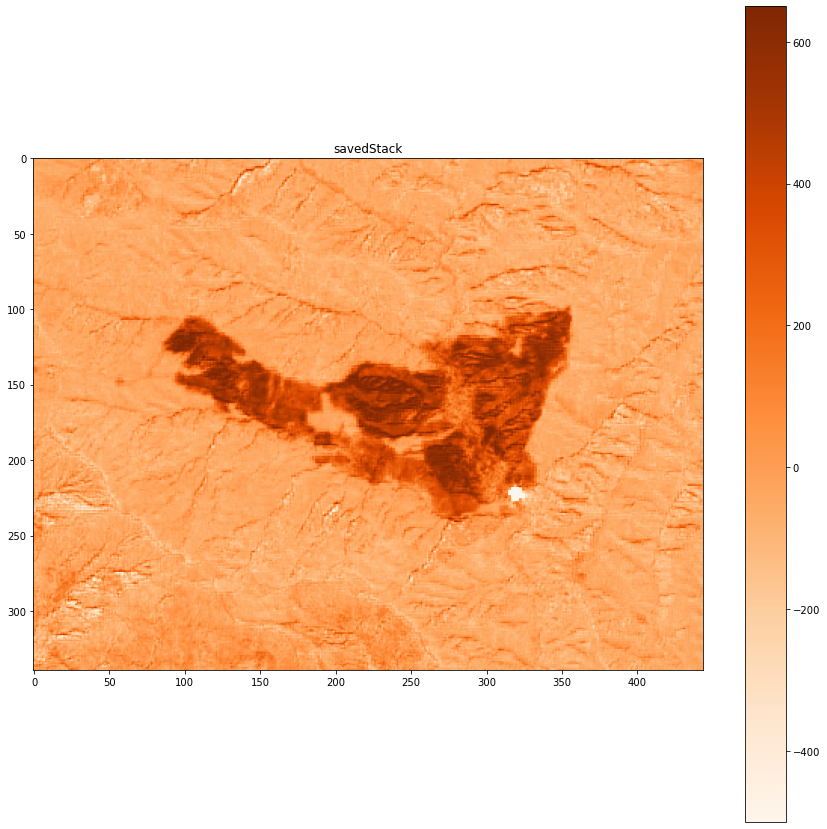

In [10]:
fig = plt.figure(figsize=(15,15))
plt.imshow(savedStack[1],cmap="Oranges")
plt.title("savedStack")
plt.clim(-500, 650)
plt.colorbar()
plt.show()